In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# Moore's Law

Microprocessor data from https://en.wikipedia.org/wiki/Transistor_count

Objective: Moore's law states that the number of transistors doubles every $m$ months (for comparable processors). We want to understand this and determine the exact number of months $m$.

Guide:
- First plot the number of transistors as a function of the year. This shows the exponential growth.
- Look at the number of transistors on a logarithmic scale (or explicitly compute the logarithm of the number of transistors before plotting).
- Model this data with a linear regression line and determine the slope of the regression line.
- Determine the information you are looking for from the slope. 

(Mathematical hint:
If you model the logarithmized $y$-values as a function of the $x$-values (for the sake of simplicity directly to the base $2$), this means
$$\log_2(y) = \beta_0 + \beta_1 \cdot x$$

Conversion to $y$ gives:
$$y = 2^{\beta_0 + \beta_1 \cdot x} = 2^{\beta_0} \cdot 2^{\beta_1 \cdot x}$$

This means that if you increase $x$ by one unit (in this case one year), $y$ (in this case the number of transistors) increases by a factor of $2^{\beta_1}$.
Or if you increase $x$ by $\frac{1}{\beta_1}$, y increases by a factor of 2. How large is $\frac{1}{\beta_1}$?)

In [4]:
microprocessors = pd.read_csv("microprocessors.csv")
microprocessors.head()

microprocessors["transistor_count_log"] = np.log2(microprocessors["transistor_count"])
microprocessors.head()

,Processor,transistor_count,year,Designer,Process (nm),Area (mm2),Transistor density (tr./mm2),transistor_count_log
0,"MP944 (20-bit, 6-chip, 28 chips total)",74442,1970,Garrett AiResearch,?,?,?,16.183829
1,"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,"10,000 nm",12 mm2,188,11.135709
2,"TMX 1795 (8-bit, 24-pin)",3078,1971,Texas Instruments,?,30.64 mm2,100.5,11.587778
3,"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,"10,000 nm",14 mm2,250,11.773139
4,"NEC μCOM-4 (4-bit, 42-pin)",2500,1973,NEC,"7,500 nm[19]",?,?,11.287712


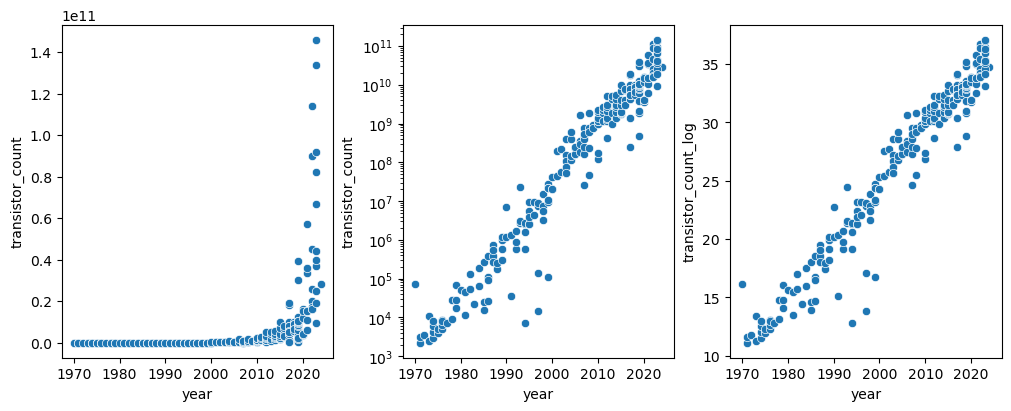

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout="constrained")

sns.scatterplot(ax=axs[0], data=microprocessors, x="year", y="transistor_count")

sns.scatterplot(ax=axs[1], data=microprocessors, x="year", y="transistor_count")
axs[1].set(yscale="log")

sns.scatterplot(ax=axs[2], data=microprocessors, x="year", y="transistor_count_log")

plt.show()

In [6]:
model_moore = LinearRegression()
model_moore.fit(microprocessors[["year"]], microprocessors["transistor_count_log"])
print("intercept: ", model_moore.intercept_)
print("slope: ", model_moore.coef_[0])

intercept:  -925.579679972111
slope:  0.47497481554151905


In [8]:
print("Transistor count doubles every", round(1 / model_moore.coef_[0], 1), "years, i.e. every", round(1 / model_moore.coef_[0] * 12, 1), "months")

Transistor count doubles every 2.1 years, i.e. every 25.3 months


In [9]:
microprocessors["transistor_count_predicted"] = np.exp2(model_moore.predict(microprocessors[["year"]]))

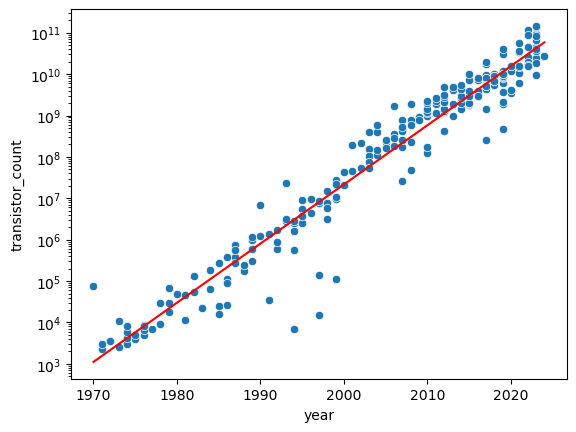

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=microprocessors, x="year", y="transistor_count")
sns.lineplot(ax=ax, data=microprocessors, x = "year", y = "transistor_count_predicted", color = "red")
ax.set(yscale="log")
plt.show()